**Project 3: Wine Prediction Redux**
---

Using the provided characteristics, use clustering algorithms to pre-process the data to garner a better prediction using the selected model.

**Imports & Declaring Constants**

In [1]:
### Tool imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### sklearn imports
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.model_selection import GridSearchCV

### Local imports
import utils.data_handling_lib as dhl
import utils.graphics_lib as gl
import utils.clustering_tools_lib as ctl

from utils.data_handling_lib import RANDOM_STATE

**Load an Explore Copy**

In [2]:
explore_raw = dhl.load_data()

explore_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


**Split dataset**

In [3]:
X_train_raw, y_train_raw, X_test_raw, y_test_raw = dhl.strat_split_dataset(X=explore_raw, label_id="quality")

**Correlation matrix**

In [4]:
corr_matrix = explore_raw.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
color                  -0.119323
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

Saving figure 0_corr_matrix_heatmap


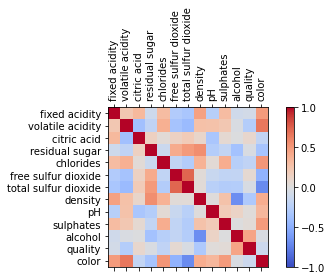

In [5]:
gl.plot_corr_matrix_heatmap(corr_matrix=corr_matrix, dataset=explore_raw, savefig=True)

First look:
    Most significant correlations for *quality* are *alcohol, density, chlorides, volatile acidity*

**KMeans test**

In [6]:
drop_features_1 = ["free sulfur dioxide", "total sulfur dioxide", "pH", "citric acid", "residual sugar", "sulphates", "volatile acidity"]
drop_features_2 = ["fixed acidity", "volatile acidity", "density", "residual sugar", "chlorides", "citric acid", "color"]
drop_features_3 = ["fixed acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","color"]



In [7]:
param_grid = dict(kmeans__n_clusters=[_ for _ in range(2,15)])

kmeans = KMeans(n_clusters=8, random_state=RANDOM_STATE)

Saving figure 1_silhouette_scores


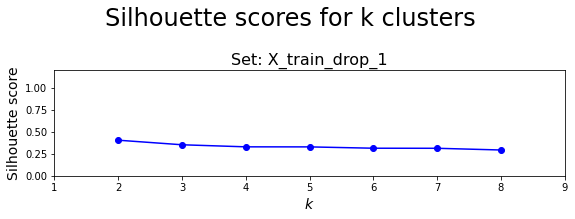

In [8]:
X_train_drop1, X_test_drop1 = X_train_raw.drop(drop_features_1, axis=1), X_test_raw.drop(drop_features_1, axis=1)

drop_1_sil_scores = ctl.get_silhouette_scores(X_train_drop1, range_upper=10)

gl.plot_silhouette_scores(silhouette_scores=drop_1_sil_scores, var_name="X_train_drop_1", savefig=True)

Saving figure 2_silhouette_scores


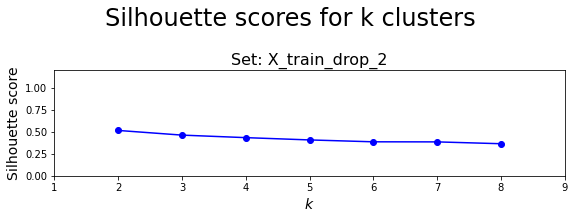

In [9]:
X_train_drop2, X_test_drop2 = X_train_raw.drop(drop_features_2, axis=1), X_test_raw.drop(drop_features_2, axis=1)

drop_2_sil_scores = ctl.get_silhouette_scores(X_train_drop2, range_upper=10)

gl.plot_silhouette_scores(silhouette_scores=drop_2_sil_scores, var_name="X_train_drop_2", savefig=True)

Saving figure 3_silhouette_scores


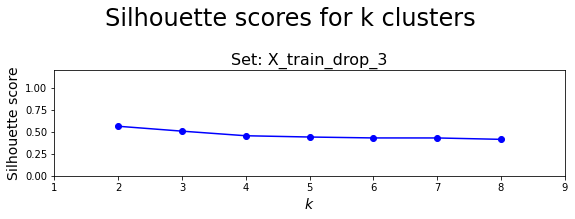

In [10]:
X_train_drop3, X_test_drop3 = X_train_raw.drop(drop_features_3, axis=1), X_test_raw.drop(drop_features_3, axis=1)

drop_3_sil_scores = ctl.get_silhouette_scores(X_train_drop3, range_upper=10)

gl.plot_silhouette_scores(silhouette_scores=drop_3_sil_scores, var_name="X_train_drop_3", savefig=True)